In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow
import cv2
from keras.models import load_model
import os

Using TensorFlow backend.


In [2]:
FRmodel = load_model('./face-rec_Google.h5')

/usr/local/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [3]:
print(FRmodel.count_params())

3743280


In [4]:
def img_to_embedding(image, model):
    image = cv2.resize(image, (96, 96)) 
    img = image[...,::-1]
    img = np.around(np.transpose(img, (2,0,1))/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict(x_train)
    return embedding

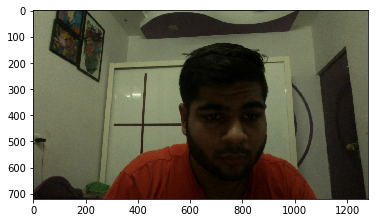

In [5]:
img = cv2.imread('./Shivang_Chopra_0002.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img,)

In [6]:
print(img_to_embedding(img,FRmodel))

[[ 0.09310503 -0.0088578  -0.03324649 -0.0383757   0.00274032  0.19772866
  -0.13509296  0.00552819 -0.03103601 -0.06799123  0.08326913  0.01597005
  -0.00585541  0.05223994  0.09061068  0.14810659 -0.01290153  0.02570527
  -0.01474852 -0.11224933 -0.02341941  0.03399521 -0.06334879 -0.12516846
   0.02104095 -0.00714522  0.10535464 -0.09270369  0.02468697  0.06066231
   0.14034571  0.04505451  0.10894549  0.03741973  0.05255396 -0.12483383
   0.03718696  0.11884437  0.03285369 -0.02189067  0.00178023  0.07455793
   0.03912972 -0.00578592  0.00907669  0.1488274   0.01864684 -0.11858511
  -0.05082514  0.06057861 -0.14600234  0.16793606 -0.07589616  0.1885944
  -0.09700999 -0.06472687 -0.04716081  0.01939493  0.10140052  0.12071114
   0.01412183 -0.01823399  0.09132095  0.03788448  0.04227191 -0.02014177
  -0.02029361  0.00449163  0.081906    0.10597289 -0.10857765  0.02926552
  -0.025096    0.00579623  0.07795174  0.05164926  0.06651633  0.19535543
  -0.16512468 -0.02280117  0.11999369 -

In [7]:
print(img_to_embedding(img,FRmodel).shape)

(1, 128)


In [8]:
dataset_path = './data/'
os.listdir(dataset_path)

['.DS_Store', 'Shivang_Chopra', 'Surii_Chopra']

In [9]:
data_x = []
data_y = []
fin_names = []

In [10]:
ctr=0
for person_name in os.listdir(dataset_path):
    label = ctr
    names = person_name.split('_')
    if person_name[0]!='.':
        first_name = names[0]
        last_name = names[1]
        fin_names.append(first_name + " " + last_name) 
        photos = os.listdir(dataset_path+person_name)
        for pic in photos:
            img = cv2.imread(dataset_path+person_name+"/"+pic)
            data_x.append(img)
            data_y.append(label)
        ctr+=1

In [11]:
data_x=np.array(data_x)
data_y=np.array(data_y)
print(data_x.shape)
print(data_y.shape)

(870, 100, 100, 3)
(870,)


In [12]:
print(data_y)
print(np.unique(data_y))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [13]:
data_y = np.array(data_y)
print(np.unique(data_y))

[0 1]


In [14]:
print(data_x)

[[[[111 116 107]
   [113 118 109]
   [114 118 112]
   ...
   [ 92  99  96]
   [ 95 102  99]
   [ 97 104 101]]

  [[ 90  95  86]
   [ 96 101  92]
   [ 97 101  95]
   ...
   [ 94 101  98]
   [ 98 105 102]
   [ 97 104 101]]

  [[ 72  80  70]
   [ 74  82  72]
   [ 78  85  78]
   ...
   [ 93 100  97]
   [ 98 105 102]
   [ 97 104 101]]

  ...

  [[ 21  16  13]
   [ 19  14  11]
   [ 17  14  10]
   ...
   [ 36  40  65]
   [ 55  58  79]
   [ 83  87 106]]

  [[ 22  17  14]
   [ 20  15  12]
   [ 17  14  10]
   ...
   [ 29  27  69]
   [ 35  34  74]
   [ 50  49  88]]

  [[ 24  19  16]
   [ 21  16  13]
   [ 18  15  11]
   ...
   [ 29  24  75]
   [ 28  23  74]
   [ 34  30  79]]]


 [[[117 121 115]
   [117 121 115]
   [117 121 115]
   ...
   [ 97 103 102]
   [ 83  88  87]
   [ 14  19  18]]

  [[115 119 113]
   [117 121 115]
   [116 120 114]
   ...
   [ 96 102 101]
   [ 83  88  87]
   [ 16  21  20]]

  [[101 105  99]
   [106 110 104]
   [112 116 110]
   ...
   [ 97 102 100]
   [ 85  90  89]
   [ 19  24

In [15]:
data_emb = []
for pict in data_x:
    data_emb.append(img_to_embedding(pict,FRmodel))

In [16]:
data_emb = np.array(data_emb)
data_emb = np.reshape(data_emb,(870,128))

In [26]:
print(data_emb[0])
print(data_emb[-1])
np.save('./data/shivang.npy',data_emb[0])
np.save('./data/suransh.npy',data_emb[-1])

[ 0.10779618 -0.01294794 -0.03040265 -0.03105257 -0.00231543  0.2060493
 -0.13469258  0.01014535 -0.0321287  -0.07866514  0.08669479  0.00573184
  0.00055845  0.0508781   0.11019456  0.14201212 -0.01960184  0.02276544
 -0.00655213 -0.11895524 -0.03788339  0.04416633 -0.06521249 -0.13030872
  0.00490573 -0.00819568  0.11814271 -0.08732891  0.03441028  0.05163202
  0.14831297  0.0448808   0.10794637  0.04387509  0.04831351 -0.12268243
  0.02959456  0.10789641  0.04061982 -0.01234853  0.01017997  0.07534009
  0.03996861 -0.00709578  0.01911539  0.16004606  0.02433702 -0.11725819
 -0.07097507  0.06452908 -0.139566    0.15929422 -0.07131196  0.19548185
 -0.09666291 -0.06175012 -0.04494344  0.02252934  0.09249265  0.11556202
  0.01836918 -0.02350772  0.08987176  0.02033771  0.04750408 -0.01018308
 -0.03676931  0.00186465  0.06543427  0.10744633 -0.11629214  0.03242556
 -0.01513402  0.00192167  0.07018524  0.05733135  0.05101422  0.19054368
 -0.16315533 -0.02085745  0.11238764 -0.07541005 -0.

In [18]:
data_emb=np.array(data_emb)
print(data_emb.shape)

(870, 128)


In [19]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, Flatten, MaxPooling2D, Dropout
from keras.utils import np_utils

In [20]:
print(np.unique(data_y))
data_y = np_utils.to_categorical(data_y)

[0 1]


In [21]:
print(data_y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [22]:
model = Sequential()
model.add(Dense(256, input_shape=(128,)))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add( Dropout(0.4) )
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
__________

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(data_emb, data_y, batch_size=10, epochs=15)

Epoch 1/15
870/870 [==============================] - 1s 2ms/step - loss: 0.6880 - acc: 0.5333
Epoch 2/15
870/870 [==============================] - 0s 395us/step - loss: 0.5502 - acc: 0.7529
Epoch 3/15
870/870 [==============================] - 0s 337us/step - loss: 0.0956 - acc: 0.9874
Epoch 4/15
870/870 [==============================] - 0s 352us/step - loss: 0.0174 - acc: 1.0000
Epoch 5/15
870/870 [==============================] - 0s 342us/step - loss: 0.0189 - acc: 0.9954
Epoch 6/15
870/870 [==============================] - 0s 342us/step - loss: 0.0045 - acc: 1.0000
Epoch 7/15
870/870 [==============================] - 0s 333us/step - loss: 0.0018 - acc: 1.0000
Epoch 8/15
870/870 [==============================] - 0s 408us/step - loss: 0.0023 - acc: 1.0000
Epoch 9/15
870/870 [==============================] - 0s 392us/step - loss: 0.0057 - acc: 0.9989
Epoch 10/15
870/870 [==============================] - 0s 392us/step - loss: 0.0026 - acc: 1.0000
Epoch 11/15
870/870 [==========

In [25]:
model.save('Emb_Recogizer.h5')